### Imports

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading data

In [17]:
df = pd.read_csv('Mall_Customers.csv')

X = df.iloc[:,[3,4]].values

### K-Means Implementation

In [18]:
class KMeans:
    def __init__(self, k = 5, max_iters = 100, tol = 1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol

    def fit(self,X):
        np.random.seed(52)
        self.centroids = X[np.random.choice(X.shape[0],self.k,replace=False)]

        for _ in range(self.max_iters):
            distances = np.linalg.norm(X[:,np.newaxis] - self.centroids, axis=2)
            labels = np.argmin(distances, axis=1)

            
            # Compute new centroids
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.k)])
            
            # Check for convergence
            if np.linalg.norm(self.centroids - new_centroids) < self.tol:
                break
            
            self.centroids = new_centroids

        self.labels = labels

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

### Label and Plot

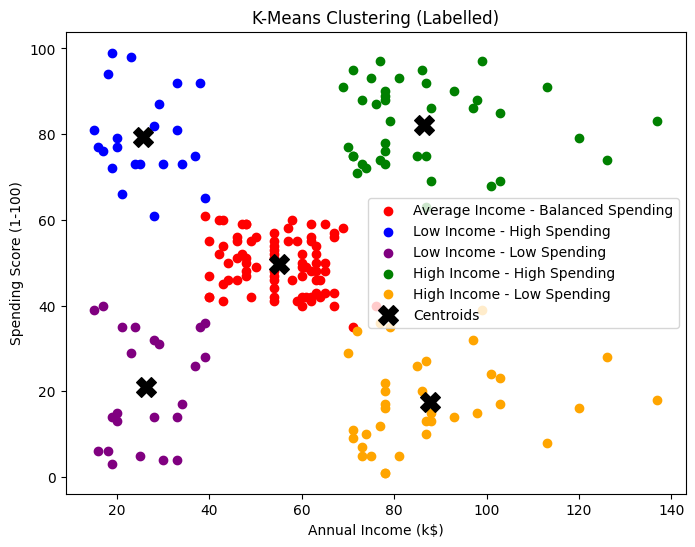

In [19]:
# Apply K-Means from scratch
kmeans = KMeansScratch(k=5)
kmeans.fit(X)

# Manually assign labels based on centroids
label_map = {
    0: "Average Income - Balanced Spending",
    1: "Low Income - High Spending",
    2: "Low Income - Low Spending",
    3: "High Income - High Spending",
    4: "High Income - Low Spending",
}

# Assign corrected labels dynamically
cluster_labels = [label_map[label] for label in kmeans.labels]

# Define colors for clusters
colors = ["red", "blue", "purple", "green", "orange"]

# Plot the clusters
plt.figure(figsize=(8, 6))

for i, color in enumerate(colors):
    plt.scatter(X[kmeans.labels == i, 0], X[kmeans.labels == i, 1], label=label_map[i], color=color)

# Plot centroids
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=200, c='black', marker='X', label='Centroids')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering (Labelled)')
plt.legend()
plt.show()
